In [14]:
import tensorflow as tf
import gradio as gr
import numpy as np
from tensorflow import keras
import os
import cv2

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [16]:
import matplotlib.pyplot as plt

In [17]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("dataset\Training and Validation", target_size = (150,150),batch_size = 32, class_mode = 'binary')
test_dataset = test.flow_from_directory("dataset\Testing", target_size = (150,150),batch_size = 32, class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D (32, (3,3), activation='relu', input_shape=(150,150,3))) 
model.add(keras.layers.MaxPool2D (2,2))
model.add(keras.layers.Conv2D (64, (3,3), activation= 'relu'))
model.add(keras.layers.MaxPool2D (2,2))
model.add(keras.layers.Conv2D (128, (3,3), activation= 'relu'))
model.add(keras.layers. MaxPool2D(2,2))
model.add(keras.layers.Conv2D (128, (3,3), activation='relu')) 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers. Flatten())
model.add(keras.layers. Dense (512, activation='relu')) 
model.add(keras.layers.Dense (1, activation='sigmoid'))

In [19]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
r = model.fit(train_dataset,epochs = 10,validation_data= test_dataset)

Epoch 1/10
58/58 [==============================] - 58s 961ms/step - loss: 0.3836 - accuracy: 0.8439 - val_loss: 0.2999 - val_accuracy: 0.8824
Epoch 2/10
58/58 [==============================] - 51s 886ms/step - loss: 0.1640 - accuracy: 0.9449 - val_loss: 0.2872 - val_accuracy: 0.8529
Epoch 3/10
58/58 [==============================] - 61s 1s/step - loss: 0.1318 - accuracy: 0.9558 - val_loss: 0.3143 - val_accuracy: 0.8382
Epoch 4/10
58/58 [==============================] - 56s 963ms/step - loss: 0.1029 - accuracy: 0.9722 - val_loss: 0.1916 - val_accuracy: 0.9706
Epoch 5/10
58/58 [==============================] - 55s 953ms/step - loss: 0.1012 - accuracy: 0.9700 - val_loss: 0.1321 - val_accuracy: 0.9559
Epoch 6/10
58/58 [==============================] - 54s 921ms/step - loss: 0.0727 - accuracy: 0.9765 - val_loss: 0.1026 - val_accuracy: 0.9559
Epoch 7/10
58/58 [==============================] - 52s 898ms/step - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.1231 - val_accuracy: 0.9706
Ep

In [21]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims (Y, axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire", fontsize=30)
    elif val == 0:
        plt.xlabel("Fire", fontsize=30)

1/1 [==============================] - 0s 145ms/step
[[1.]]


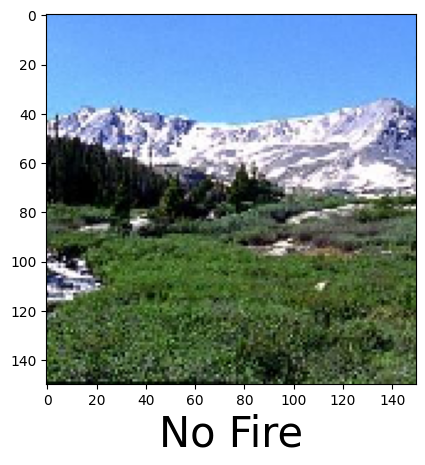

In [22]:
predictImage('dataset/Testing/nofire/abc337.jpg')

1/1 [==============================] - 0s 40ms/step
[[0.]]


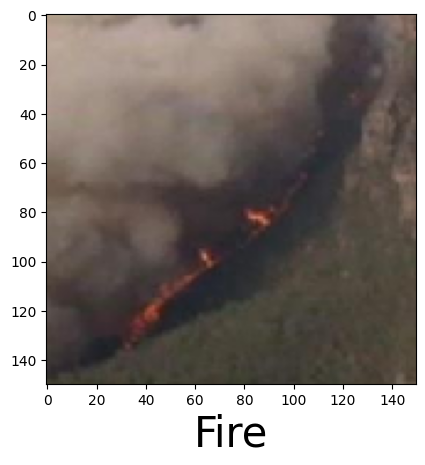

In [23]:
predictImage('dataset/Testing/fire/abc174.jpg')

In [24]:
from keras.models import load_model
model.save("cnn1.h5")

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

def predictImage(image):
    try:
        # Preprocess the image for the model
        img = image.resize((150, 150))  # Resize to the model's input shape
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

        # Make prediction using the trained model
        prediction = model.predict(img_array)[0][0]

        if prediction >= 0.5:
            label = "No Fire"
        else:
            label = "Fire"

        return label
    except Exception as e:
        return str(e)


demo = gr.Interface(
    fn=predictImage,
    inputs=gr.inputs.Image(type="pil"),
    outputs=gr.outputs.Label(num_top_classes=2),
)

demo.launch()


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.0, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x202d1f2b2d0>, 'http://127.0.0.1:7862/', None)